In [1]:
import h5py
import galaxychop as gchop
import uttr
import attr
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

# Leo la galaxia

In [2]:
gal = gchop.read_hdf5("../galaxy-chop/tests/datasets/gal394242.h5")

In [3]:
gal.to_dataframe()

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,potential,kinetic_energy,total_energy,Jx,Jy,Jz
0,stars,0,5.224283e+05,0.120173,0.001515,-0.037391,10.773575,-6.878906,-20.425400,0.0,-195699.620206,290.293111,-195409.327095,-0.288157,2.051746,-0.842982
1,stars,0,9.745897e+05,-0.019927,0.032591,0.005120,20.282349,8.661957,-7.947495,0.0,-196176.962277,274.782915,-195902.179362,-0.303364,-0.054520,-0.833619
2,stars,0,6.935776e+05,-0.097670,-0.022788,0.046636,-14.897980,6.957092,-10.818886,0.0,-195152.120168,193.699612,-194958.420557,-0.077915,-1.751461,-1.018987
3,stars,0,1.070959e+06,-0.007224,-0.138971,0.176169,-8.665253,-4.337433,5.506927,0.0,-194695.767625,62.113089,-194633.654536,-0.001182,-1.486768,-1.172886
4,stars,0,6.013803e+05,0.095277,0.001167,0.100484,23.508469,-7.842865,-3.754723,0.0,-195703.942688,314.128285,-195389.814402,0.783702,2.719973,-0.774688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57279,gas,2,1.400046e+06,2.415113,-8.443658,-0.427454,117.975723,-243.209320,31.390686,0.0,-129252.826165,37027.209909,-92225.616256,-369.012963,-126.241204,408.768823
57280,gas,2,1.375867e+06,-4.756847,5.970680,-4.109694,-136.718105,232.501099,-56.024063,0.0,-129835.893336,37943.648417,-91892.244919,621.006707,295.371727,-289.672123
57281,gas,2,9.908498e+05,-9.376904,-1.965296,-0.563573,-188.311616,31.467773,179.615128,0.0,-132966.102621,34356.539847,-98609.562774,-335.262575,1790.361085,-665.158420
57282,gas,2,1.456959e+06,-6.880090,0.314529,-6.284694,-261.390251,69.243408,-137.456593,0.0,-132205.106762,46006.913910,-86198.192853,391.939479,697.043885,-394.186002


## Centrado y alinamiento de la galaxia

In [4]:
gal = gchop.center(gal)

In [5]:
gal = gchop.star_align(gal)

In [6]:
circ = gchop.utils.jcirc(gal)
circ

JCirc(normalized_star_energy=array([-0.99509357, -0.99760334, -0.99279739, ..., -0.13989039,
       -0.08796932, -0.06652457]), normalized_star_Jz=array([-9.24079355e-05,  1.56582528e-04, -3.68821838e-04, ...,
       -1.37554847e-01,  4.23475904e-01,  7.12919724e-01]), eps=array([-0.10974301,  0.38068977, -0.29837353, ..., -0.17532475,
        0.54943866,  0.86226812]), eps_r=array([0.8643671 , 1.15379305, 0.53883725, ..., 0.53970452, 1.12444831,
       0.3601765 ]), x=array([-1.        , -0.95927071, -0.9004535 , -0.85024711, -0.80186797,
       -0.75018146, -0.70010322, -0.65051785, -0.60334024, -0.55155718,
       -0.50014295, -0.45108036, -0.40063531, -0.36278941, -0.30919036,
       -0.25092359, -0.24736776, -0.18470211, -0.1248638 , -0.09920325,
       -0.09229182, -0.0859902 , -0.08130821, -0.07514371, -0.07208031,
       -0.0660381 , -0.06311026, -0.05856595, -0.04632291, -0.04388853,
       -0.03508332, -0.03128673, -0.02683017, -0.00282447]), y=array([0.        , 0.00698994, 

# Descomposicion models Data Frame

In [7]:
df = pd.read_pickle('df_stars.pkl')

In [8]:
df

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,...,lab_th,lab_ab,lab_cr,lab_km,lab_km3,lab_km4,lab_gmm,lab_gmm3,lab_gmm4,lab_agmm
0,stars,0,5.224283e+05,-0.054824,-0.063223,-0.260845,5.949678,22.550460,-6.055106,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,1.0
1,stars,0,9.745897e+05,-0.161120,-0.127723,-0.177528,21.909445,8.321999,-0.535136,0.0,...,0.0,1.0,1.0,0.0,2.0,3.0,0.0,2.0,1.0,1.0
2,stars,0,6.935776e+05,-0.256088,-0.165705,-0.196836,-9.493458,7.263093,15.637166,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,1.0
3,stars,0,1.070959e+06,-0.235092,-0.256281,-0.369501,-9.675913,-5.471289,-0.817244,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,1.0,1.0
4,stars,0,6.013803e+05,-0.076621,-0.199932,-0.282408,16.533770,8.094719,-17.010778,0.0,...,0.0,0.0,1.0,0.0,2.0,3.0,0.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32062,stars,0,1.343808e+06,15.394374,-13.615094,0.149480,249.650695,244.472680,-41.765153,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
32063,stars,0,7.382408e+05,-7.436244,16.466565,-0.735001,-267.224099,281.248845,-52.902787,0.0,...,0.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,2.0,0.0
32064,stars,0,6.786477e+05,15.171295,-10.470204,-6.430860,-353.009725,159.227328,-72.137340,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,1.0
32065,stars,0,8.290853e+05,14.695170,15.612993,-5.270562,-4.742671,263.201137,314.186911,0.0,...,0.0,1.0,1.0,1.0,2.0,3.0,0.0,1.0,2.0,1.0


# Plots dynamical space

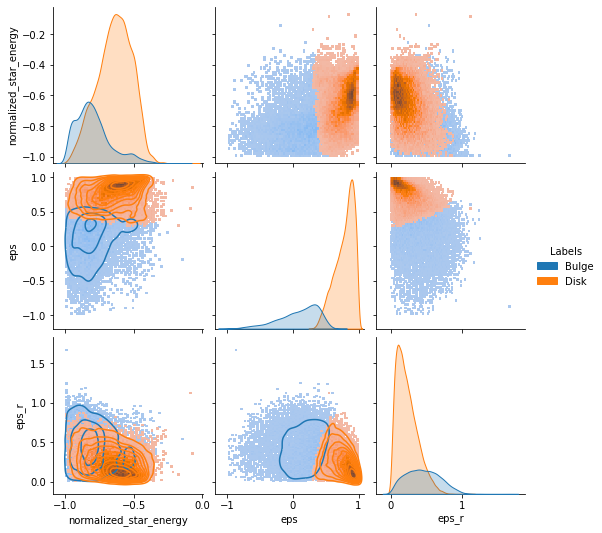

In [9]:
g = gal.plot.circ_pairplot(attributes=['normalized_star_energy', 'eps','eps_r'], labels=df.lab_km, lmap={0: 'Bulge', 1: 'Disk'})
g.map_lower(sns.kdeplot, levels=10, color=".2")

#plt.savefig('gchop_plots/pairplot_kmeans.pdf') 

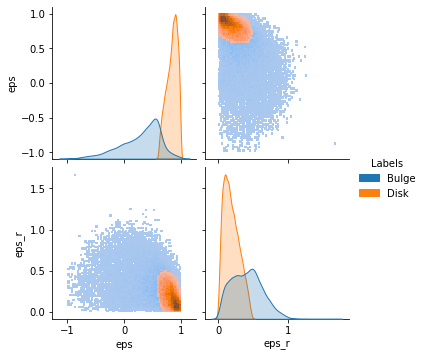

In [10]:
g = gal.plot.circ_pairplot(attributes=['eps','eps_r'],labels=df.lab_gmm, lmap={0: 'Bulge', 1: 'Disk'})
#g.map_lower(sns.kdeplot, levels=3, color=".2")

## envolvente Jcirc

/home/ataverna/.virtualenvs/scisoft38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '$y$')

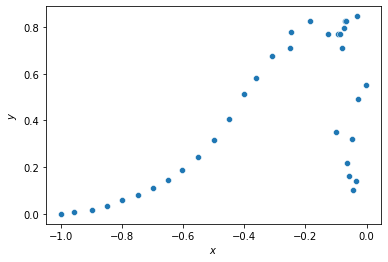

In [11]:
ax = sns.scatterplot(circ.x,circ.y)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")

## energy vs Jz

<AxesSubplot:xlabel='total_energy', ylabel='Jz'>

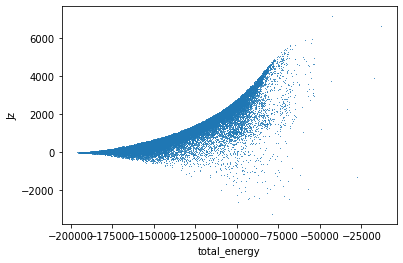

In [12]:
gal.plot.scatter("total_energy", "Jz", ptypes=['stars'], marker='.', linewidth=0, s=4 )

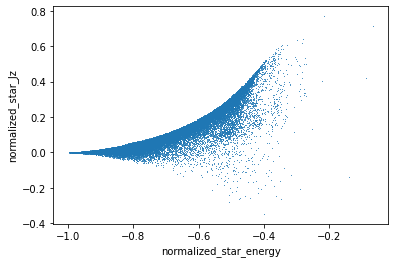

In [13]:
g=gal.plot.circ_scatter("normalized_star_energy", "normalized_star_Jz", 
                      marker='.', linewidth=0, s=4
        )
#plt.savefig('gchop_plots/E_vs_Jz_stars.png', dpi=100)

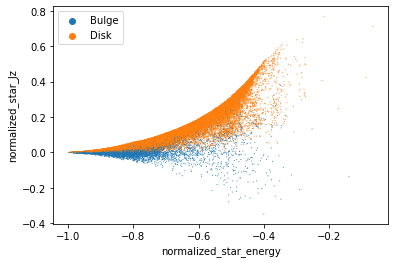

In [14]:
g=gal.plot.circ_scatter("normalized_star_energy", "normalized_star_Jz", 
                      marker='.',labels=df.lab_ab, lmap={0: 'Bulge', 1: 'Disk'},
                      linewidth=0, s=4
        )
g.legend()

<AxesSubplot:xlabel='m', ylabel='Density'>

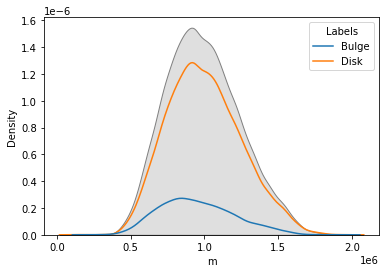

In [15]:
gal.plot.kde("m", ptypes=['stars'], color='gray', fill=True)
gal.plot.kde("m", ptypes=['stars'], labels = df.lab_ab, lmap={0: 'Bulge', 1: 'Disk'})

## Eps

Text(0.5, 0, '$E_{star}/E_{tot}$')

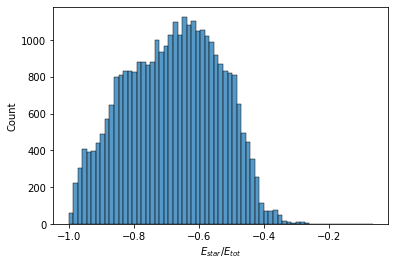

In [16]:
ax = sns.histplot(circ.normalized_star_energy)
ax.set_xlabel(r"$E_{star}/E_{tot}$")

<AxesSubplot:xlabel='eps', ylabel='Density'>

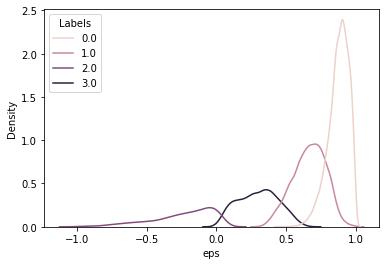

In [17]:
gal.plot.circ_kde("eps",labels=df.lab_km4)

<AxesSubplot:xlabel='eps', ylabel='Density'>

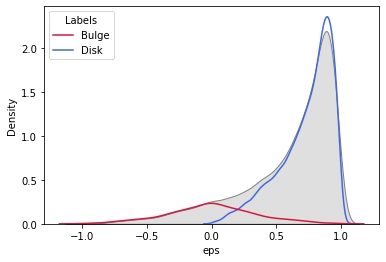

In [18]:
gal.plot.circ_kde("eps", color='gray', fill=True)
gal.plot.circ_kde("eps",labels=df.lab_ab, lmap={0: 'Bulge', 1: 'Disk'}, palette=['crimson','royalblue'])

#plt.savefig('gchop_plots/eps_stars.png', dpi=100)

<AxesSubplot:xlabel='eps', ylabel='Count'>

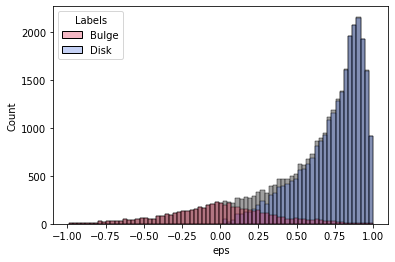

In [19]:
gal.plot.circ_hist("eps", color='gray', fill=True)
gal.plot.circ_hist("eps",labels=df.lab_ab, lmap={0: 'Bulge', 1: 'Disk'}, palette=['crimson','royalblue'],alpha=0.3)


## Plots eps all models

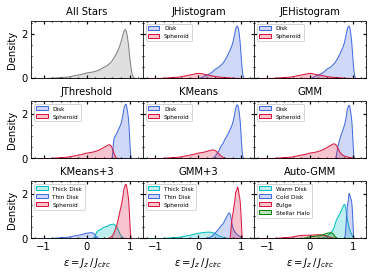

In [20]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.4,wspace=0)

gal.plot.circ_kde("eps", color='gray', fill=True, ax=ax1,legend=False)
gal.plot.circ_kde("eps",labels=df.lab_ab, lmap={0: 'Bulge', 1: 'Disk'}, palette=['crimson','royalblue'], ax=ax2, fill=True)
gal.plot.circ_kde("eps",labels=df.lab_cr, lmap={0: 'Bulge', 1: 'Disk'}, palette=['crimson','royalblue'], ax=ax3, fill=True)
gal.plot.circ_kde("eps",labels=df.lab_th, lmap={0: 'Bulge', 1: 'Disk'}, palette=['crimson','royalblue'], ax=ax4, fill=True)
gal.plot.circ_kde("eps",labels=df.lab_km, lmap={0: 'Bulge', 1: 'Disk'}, palette=['crimson','royalblue'], ax=ax5, fill=True)
gal.plot.circ_kde("eps",labels=df.lab_gmm, lmap={0: 'Bulge', 1: 'Disk'}, palette=['crimson','royalblue'], ax=ax6, fill=True)
gal.plot.circ_kde("eps",labels=df.lab_km3, palette=['crimson','royalblue', 'c'], ax=ax7, fill=True)
gal.plot.circ_kde("eps",labels=df.lab_gmm3, palette=['crimson','royalblue', 'c'], ax=ax8, fill=True)
gal.plot.circ_kde("eps",labels=df.lab_agmm, palette=['g', 'crimson','royalblue', 'c'], ax=ax9, fill=True)

ax1.set_xlabel("")
ax2.set_xlabel("")
ax3.set_xlabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")
ax5.set_ylabel("")
ax6.set_ylabel("")
ax7.set_xlabel("$\epsilon = J_z \, / \,J_{circ}$", fontsize=10)
ax8.set_xlabel("$\epsilon = J_z \, / \,J_{circ}$", fontsize=10)
ax9.set_xlabel("$\epsilon = J_z \, / \,J_{circ}$", fontsize=10)

#----------- minor ticks
ax1.minorticks_on() ; ax1.tick_params(labelsize=10)
ax1.tick_params('both', length=1, width=1.2,which='minor', direction='in', right=True,top=True)
ax1.tick_params('both', length=3, width=1.2,which='major', direction='in', right=True,top=True)
ax2.minorticks_on() ; ax2.tick_params(labelsize=10)
ax2.tick_params('both', length=1, width=1.2,which='minor', direction='in', right=True,top=True)
ax2.tick_params('both', length=3, width=1.2,which='major', direction='in', right=True,top=True)
ax3.minorticks_on() ; ax3.tick_params(labelsize=10)
ax3.tick_params('both', length=1, width=1.2,which='minor', direction='in', right=True,top=True)
ax3.tick_params('both', length=3, width=1.2,which='major', direction='in', right=True,top=True)
ax4.minorticks_on() ; ax4.tick_params(labelsize=10)
ax4.tick_params('both', length=1, width=1.2,which='minor', direction='in', right=True,top=True)
ax4.tick_params('both', length=3, width=1.2,which='major', direction='in', right=True,top=True)
ax5.minorticks_on() ; ax5.tick_params(labelsize=10)
ax5.tick_params('both', length=1, width=1.2,which='minor', direction='in', right=True,top=True)
ax5.tick_params('both', length=3, width=1.2,which='major', direction='in', right=True,top=True)
ax6.minorticks_on() ; ax6.tick_params(labelsize=10)
ax6.tick_params('both', length=1, width=1.2,which='minor', direction='in', right=True,top=True)
ax6.tick_params('both', length=3, width=1.2,which='major', direction='in', right=True,top=True)
ax7.minorticks_on() ; ax7.tick_params(labelsize=10)
ax7.tick_params('both', length=1, width=1.2,which='minor', direction='in', right=True,top=True)
ax7.tick_params('both', length=3, width=1.2,which='major', direction='in', right=True,top=True)
ax8.minorticks_on() ; ax8.tick_params(labelsize=10)
ax8.tick_params('both', length=1, width=1.2,which='minor', direction='in', right=True,top=True)
ax8.tick_params('both', length=3, width=1.2,which='major', direction='in', right=True,top=True)
ax9.minorticks_on() ; ax9.tick_params(labelsize=10)
ax9.tick_params('both', length=1, width=1.2,which='minor', direction='in', right=True,top=True)
ax9.tick_params('both', length=3, width=1.2,which='major', direction='in', right=True,top=True)
#------------------------------

#Title
ax1.set_title('All Stars', fontsize=10)
ax2.set_title('JHistogram', fontsize=10)
ax3.set_title('JEHistogram', fontsize=10)
ax4.set_title('JThreshold', fontsize=10)
ax5.set_title('KMeans', fontsize=10)
ax6.set_title('GMM', fontsize=10)
ax7.set_title('KMeans+3', fontsize=10)
ax8.set_title('GMM+3', fontsize=10)
ax9.set_title('Auto-GMM', fontsize=10)

# Put a legend below current axis
ax2.legend(title='', loc='upper left', fontsize='xx-small', labels=['Disk', 'Spheroid'])
ax3.legend(title='', loc='upper left', fontsize='xx-small', labels=['Disk', 'Spheroid'])
ax4.legend(title='', loc='upper left', fontsize='xx-small', labels=['Disk', 'Spheroid'])
ax5.legend(title='', loc='upper left', fontsize='xx-small', labels=['Disk', 'Spheroid'])
ax6.legend(title='', loc='upper left', fontsize='xx-small', labels=['Disk', 'Spheroid'])
ax7.legend(title='', loc='upper left', fontsize='xx-small', labels=['Thick Disk', 'Thin Disk', 'Spheroid'])
ax8.legend(title='', loc='upper left', fontsize='xx-small', labels=['Thick Disk', 'Thin Disk', 'Spheroid'])
ax9.legend(title='', loc='upper left', fontsize='xx-small', labels=['Warm Disk', 'Cold Disk', 'Bulge', 'Stellar Halo'])

#plt.savefig('eps_full.png', dpi=200)

In [21]:
# Put a legend below current axis
fig.legend(title='Components', bbox_to_anchor=(-0.6, 2.3), loc='upper left', fontsize='x-small', 
           labels=['Cold Disk', 'Warm Disk','C', 'D'], ncol = 4)

<AxesSubplot:xlabel='eps', ylabel='Density'>

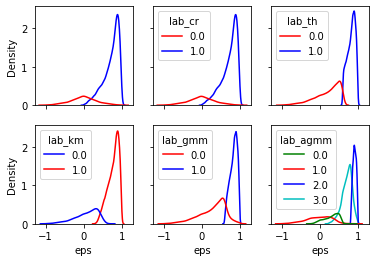

In [22]:
data = {'eps': circ.eps, 'lab_km': df.lab_km, 'lab_cr': df.lab_cr, 'lab_ab': df.lab_ab, 'lab_th': df.lab_th,
        'lab_gmm': df.lab_gmm, 'lab_agmm': df.lab_agmm}
dfc = pd.DataFrame(data)

fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3, sharex=True, sharey=True)
#sns.histplot(data=df, x="eps", hue="lab_km", ax=ax1)

sns.kdeplot(data=dfc, x="eps", hue="lab_ab", ax=ax1, palette=['r', 'b'],legend=False)
sns.kdeplot(data=dfc, x="eps", hue="lab_cr", ax=ax2, palette=['r', 'b'])
sns.kdeplot(data=dfc, x="eps", hue="lab_th", ax=ax3, palette=['r', 'b'])
sns.kdeplot(data=dfc, x="eps", hue="lab_km", ax=ax4, palette=['b', 'r'])
sns.kdeplot(data=dfc, x="eps", hue="lab_gmm", ax=ax5, palette=['r', 'b'])
sns.kdeplot(data=dfc, x="eps", hue="lab_agmm", ax=ax6, palette=['g', 'r', 'b', 'c'])

# Bulge

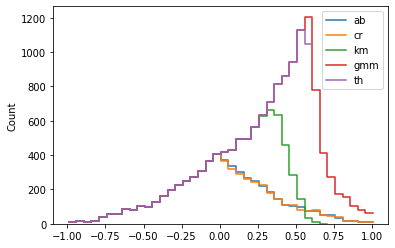

In [23]:
eps = circ.eps

mask_b_ab = np.where(df.lab_ab == 0)
#mask_d_ab = np.where(df.lab_ab == 1)
mask_b_th = np.where(df.lab_th == 0)
mask_b_cr = np.where(df.lab_cr == 0)
mask_b_km = np.where(df.lab_km == 0)
mask_b_gmm = np.where(df.lab_gmm == 0)
mask_b_agmm = np.where((df.lab_agmm == 0) & (df.lab_agmm == 1))


sns.histplot(eps[mask_b_ab], binwidth=0.05, element='step', fill=False, label='ab')
sns.histplot(eps[mask_b_cr], binwidth=0.05, element='step', fill=False, label='cr')
sns.histplot(eps[mask_b_km], binwidth=0.05, element='step', fill=False, label='km')
sns.histplot(eps[mask_b_gmm], binwidth=0.05, element='step', fill=False, label='gmm')
sns.histplot(eps[mask_b_agmm], binwidth=0.05, element='step', fill=False, label='agmm')
sns.histplot(eps[mask_b_th], binwidth=0.05, element='step', fill=False, label='th')
plt.legend()

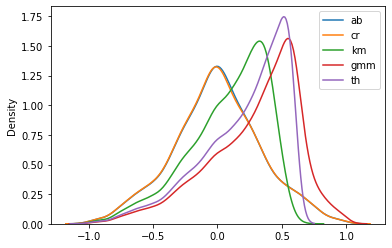

In [24]:
eps = circ.eps

mask_b_ab = np.where(df.lab_ab == 0)
#mask_d_ab = np.where(df.lab_ab == 1)
mask_b_th = np.where(df.lab_th == 0)
mask_b_cr = np.where(df.lab_cr == 0)
mask_b_km = np.where(df.lab_km == 0)
mask_b_gmm = np.where(df.lab_gmm == 0)
mask_b_agmm = np.where((df.lab_agmm == 0) & (df.lab_agmm == 1))


sns.kdeplot(eps[mask_b_ab], label='ab')
sns.kdeplot(eps[mask_b_cr], label='cr')
sns.kdeplot(eps[mask_b_km], label='km')
sns.kdeplot(eps[mask_b_gmm], label='gmm')
sns.kdeplot(eps[mask_b_agmm], label='agmm')
sns.kdeplot(eps[mask_b_th], label='th')
plt.legend()

# Disk

In [25]:
eps = circ.eps

mask_d_ab = np.where(df.lab_ab == 1)
mask_d_th = np.where(df.lab_th == 1)
mask_d_cr = np.where(df.lab_cr == 1)
mask_d_km = np.where(df.lab_km == 1)
mask_d_gmm = np.where(df.lab_gmm == 1)
mask_d_agmm = np.where((df.lab_agmm == 2) & (df.lab_agmm == 3))
